In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit, StratifiedKFold
%matplotlib inline 
sns.set(style="ticks")

In [5]:
#ph-recognition
#Try to predict pH value based on RGB color 
data = pd.read_csv('ph-data.csv', sep=",")
data.shape

(653, 4)

In [6]:
data.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [7]:
data.tail()

,blue,green,red,label
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13
652,131,2,77,14


In [8]:
data.dtypes

blue     int64
green    int64
red      int64
label    int64
dtype: object

In [9]:
# проверим есть ли пропущенные значения
data.isnull().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [10]:
#3) С использованием метода train_test_split разделите выборку на обучающую и тестовую

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'label'], 
                                                   data['label'], 
                                                   test_size = 0.2, 
                                                   random_state = 1)

In [12]:
# Размер обучающей выборки
x_train.shape, y_train.shape

((522, 3), (522,))

In [13]:
# Размер тестовой выборки
x_test.shape, y_test.shape

((131, 3), (131,))

In [14]:
#4) Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. 
#Оцените качество модели с помощью трех подходящих для задачи метрик.

# 3 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=3)
cl1_1.fit(x_train, y_train)
target1_1 = cl1_1.predict(x_test)
target1_1

array([ 6,  9,  1, 13, 11,  7,  6,  5,  0,  9,  5,  1,  6,  9,  5,  2,  7,
       11,  9, 11, 13,  2,  6,  5,  3,  5,  8, 12,  2,  5, 12,  9,  1,  2,
        3,  5, 13, 10,  1,  4, 10,  3, 11,  4,  8,  6,  0, 13, 14, 14,  9,
        0, 14,  4,  1,  0,  6, 11,  3, 10,  4, 10,  3, 11,  2,  9, 11,  3,
        4,  4,  8,  0,  3,  7, 13,  2,  2,  5,  0,  2, 14, 11,  2,  7,  1,
       13,  2,  2, 10,  2, 14,  5, 11,  3, 13,  6, 14, 14,  4,  7, 10,  5,
        0,  8,  5,  1,  0,  1, 13,  2, 14,  7,  4, 10, 14,  9,  6,  4,  1,
       12,  0,  5, 10,  5,  2, 12,  0,  1,  0, 10,  8], dtype=int64)

In [15]:
#5 ближайших соседей

cl1_2 = KNeighborsClassifier(n_neighbors=5)
cl1_2.fit(x_train, y_train)
target1_2 = cl1_2.predict(x_test)
target1_2

array([ 6, 10,  1, 14, 11,  7,  6,  5,  0,  9,  5,  1,  6,  9,  5,  2,  7,
       11,  9, 11, 13,  2,  6,  5,  3,  5,  8, 12,  2,  5, 12,  9,  1,  2,
        2,  5, 13, 11,  1,  4, 10,  3, 11,  4,  8,  6,  0, 13, 13, 14,  9,
        0, 14,  4,  1,  0,  6, 11,  3, 10,  4, 10,  2, 13,  2,  9, 11,  3,
        4,  4,  8,  0,  3,  7, 14,  2,  2,  5,  0,  2, 14, 11,  2,  7,  1,
       13,  2,  1, 10,  2, 14,  5, 11,  3, 13,  6, 14, 14,  4,  7, 10,  4,
        0,  8,  5,  1,  0,  1, 14,  2, 14,  7,  4, 10, 14,  9,  6,  5,  1,
       12,  0,  5, 10,  5,  2, 12,  0,  1,  0, 10,  8], dtype=int64)

In [16]:
#метрика accurancy
# 3 ближайших соседа
accuracy_score(y_test, target1_1)

0.7557251908396947

In [17]:
#5 ближайших соседей
accuracy_score(y_test, target1_2)

0.7251908396946565

In [18]:
#чтобы избежать проблемы дисбаланса классов используем метрику balanced_accuracy_score
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [19]:
# Если целевой признак ==6, 
# то будем считать этот случай 1 в бинарном признаке
bin_y_test = convert_target_to_binary(y_test, 6)
list(zip(y_test, bin_y_test))

[(6, 1),
 (10, 0),
 (1, 0),
 (13, 0),
 (11, 0),
 (7, 0),
 (6, 1),
 (9, 0),
 (0, 0),
 (8, 0),
 (6, 1),
 (4, 0),
 (6, 1),
 (9, 0),
 (6, 1),
 (2, 0),
 (6, 1),
 (11, 0),
 (9, 0),
 (11, 0),
 (13, 0),
 (2, 0),
 (6, 1),
 (5, 0),
 (6, 1),
 (5, 0),
 (8, 0),
 (12, 0),
 (2, 0),
 (5, 0),
 (12, 0),
 (9, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (6, 1),
 (13, 0),
 (12, 0),
 (1, 0),
 (8, 0),
 (10, 0),
 (4, 0),
 (11, 0),
 (8, 0),
 (8, 0),
 (5, 0),
 (0, 0),
 (13, 0),
 (9, 0),
 (14, 0),
 (9, 0),
 (0, 0),
 (14, 0),
 (4, 0),
 (1, 0),
 (0, 0),
 (6, 1),
 (11, 0),
 (3, 0),
 (10, 0),
 (4, 0),
 (10, 0),
 (4, 0),
 (12, 0),
 (2, 0),
 (9, 0),
 (11, 0),
 (3, 0),
 (4, 0),
 (4, 0),
 (10, 0),
 (0, 0),
 (3, 0),
 (7, 0),
 (13, 0),
 (2, 0),
 (2, 0),
 (5, 0),
 (0, 0),
 (2, 0),
 (14, 0),
 (10, 0),
 (2, 0),
 (7, 0),
 (1, 0),
 (13, 0),
 (6, 1),
 (2, 0),
 (12, 0),
 (2, 0),
 (14, 0),
 (5, 0),
 (11, 0),
 (3, 0),
 (13, 0),
 (7, 0),
 (14, 0),
 (14, 0),
 (4, 0),
 (7, 0),
 (10, 0),
 (6, 1),
 (0, 0),
 (8, 0),
 (5, 0),
 (1, 0),
 (3, 0),
 (2, 

In [20]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 6)
bin_target1_2 = convert_target_to_binary(target1_2, 6)

In [21]:
#3 neighbours
balanced_accuracy_score(bin_y_test, bin_target1_1)

0.6957282913165266

In [22]:
#5 neighbours
balanced_accuracy_score(bin_y_test, bin_target1_2)

0.6957282913165266

In [23]:
# По умолчанию метрики precision считаются для 1 класса бинарной классификации
# Для 3 ближайших соседей
precision_score(bin_y_test, bin_target1_1), recall_score(bin_y_test, bin_target1_1)

(0.625, 0.4166666666666667)

In [24]:
# Для 5 ближайших соседей
precision_score(bin_y_test, bin_target1_2), recall_score(bin_y_test, bin_target1_2)

(0.625, 0.4166666666666667)

In [25]:
#5)Постройте модель и оцените качество модели с использованием кросс-валидации. 
#Проведите эксперименты с тремя различными стратегиями кросс-валидации.
cols_x = ['blue', 'green', 'red']   
# целевой признак
col_y = 'label'
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                        data[cols_x], data[col_y], cv=4)

In [26]:
# Значение метрики accuracy для 4 фолдов
scores

array([0.84146341, 0.49390244, 0.79141104, 0.69135802])

In [27]:
# Усредненное значение метрики accuracy для 4 фолдов
np.mean(scores)

0.70453373032367

In [28]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [29]:
#использование cross_validate, которая позволяет использовать для оценки несколько метрик и возращает более детальную информацию
scores = cross_validate(KNeighborsClassifier(n_neighbors=5), 
                        data[cols_x], data[col_y], scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00462151, 0.00731635, 0.00500417]),
 'score_time': array([0.05195951, 0.05331278, 0.04233408]),
 'test_f1': array([0.76280653, 0.62050182, 0.64859206]),
 'test_precision': array([0.77082466, 0.63642973, 0.67360932]),
 'test_recall': array([0.76233184, 0.62162162, 0.65384615]),
 'train_f1': array([0.75870103, 0.78513168, 0.75816172]),
 'train_precision': array([0.76320672, 0.79188109, 0.76575815]),
 'train_recall': array([0.76046512, 0.78422274, 0.75730337])}

In [30]:
#k-fold - стратегия кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         data[cols_x], data[col_y], 
                         cv=KFold(n_splits=4))
scores

array([0.84146341, 0.49693252, 0.79141104, 0.6993865 ])

In [31]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        data[cols_x], data[col_y], scoring=scoring, 
                        cv=KFold(n_splits=3), return_train_score=True)
scores

{'fit_time': array([0.00535703, 0.00367045, 0.00489783]),
 'score_time': array([0.05643773, 0.06669497, 0.05551076]),
 'test_f1': array([0.76650823, 0.63937944, 0.6494849 ]),
 'test_precision': array([0.77304384, 0.6593833 , 0.66252848]),
 'test_recall': array([0.76605505, 0.63761468, 0.65437788]),
 'train_f1': array([0.79135955, 0.83971524, 0.80908048]),
 'train_precision': array([0.7954776 , 0.84475192, 0.81209178]),
 'train_recall': array([0.79310345, 0.83908046, 0.80963303])}

In [32]:
#ShuffleSplit
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         data[cols_x], data[col_y], 
                         cv=ShuffleSplit(n_splits=5, test_size=0.25))
scores

array([0.70121951, 0.63414634, 0.74390244, 0.73780488, 0.72560976])

In [33]:
#6)Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации. 

n_range = np.array(range(3,33,3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30])}]

In [34]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(x_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
clf_gs.cv_results_

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are acces

{'mean_fit_time': array([0.01012812, 0.01235967, 0.01163816, 0.01494889, 0.00439   ,
        0.01074924, 0.0044364 , 0.00401583, 0.00536175, 0.00774145]),
 'mean_score_time': array([0.02786288, 0.03529377, 0.03671722, 0.03123302, 0.01209278,
        0.01256075, 0.01266665, 0.01243424, 0.01520262, 0.01784458]),
 'mean_test_score': array([0.70881226, 0.6954023 , 0.70114943, 0.6954023 , 0.6743295 ,
        0.66283525, 0.65708812, 0.63601533, 0.60727969, 0.58045977]),
 'mean_train_score': array([0.80311464, 0.73888204, 0.72840316, 0.71023173, 0.69442267,
        0.68286018, 0.66413172, 0.65983287, 0.63778897, 0.61679963]),
 'param_n_neighbors': masked_array(data=[3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 6},
  {'n_neighbors': 9},
  {'n_neighbors': 12},
  {'n_neighbors': 15},
  {'n_nei

In [36]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [37]:
# Лучшее значение метрики
clf_gs.best_score_

0.7088122605363985

In [38]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 3}

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


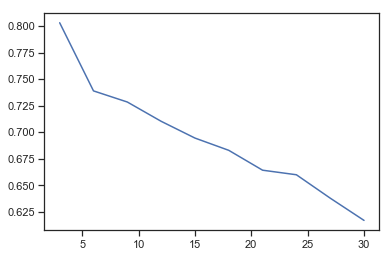

In [39]:
# Изменение качества на обучающей выборке
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])

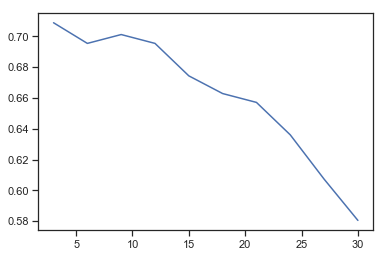

In [40]:
# Изменение качества на тестовой выборке
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [41]:
#7)Повторите пункт 4 для найденного оптимального значения гиперпараметра K. 
#Сравните качество полученной модели с качеством модели, полученной в пункте 4.

In [42]:
# 3 ближайших соседа
cl_best = KNeighborsClassifier(n_neighbors=3)
cl_best.fit(x_train, y_train)
target_best = cl_best.predict(x_test)
target_best

array([ 6,  9,  1, 13, 11,  7,  6,  5,  0,  9,  5,  1,  6,  9,  5,  2,  7,
       11,  9, 11, 13,  2,  6,  5,  3,  5,  8, 12,  2,  5, 12,  9,  1,  2,
        3,  5, 13, 10,  1,  4, 10,  3, 11,  4,  8,  6,  0, 13, 14, 14,  9,
        0, 14,  4,  1,  0,  6, 11,  3, 10,  4, 10,  3, 11,  2,  9, 11,  3,
        4,  4,  8,  0,  3,  7, 13,  2,  2,  5,  0,  2, 14, 11,  2,  7,  1,
       13,  2,  2, 10,  2, 14,  5, 11,  3, 13,  6, 14, 14,  4,  7, 10,  5,
        0,  8,  5,  1,  0,  1, 13,  2, 14,  7,  4, 10, 14,  9,  6,  4,  1,
       12,  0,  5, 10,  5,  2, 12,  0,  1,  0, 10,  8], dtype=int64)

In [43]:
# 3 ближайших соседа
accuracy_score(y_test, target_best)

0.7557251908396947

In [44]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [45]:
bin_y_best = convert_target_to_binary(y_test, 6)
list(zip(y_test, bin_y_best))

[(6, 1),
 (10, 0),
 (1, 0),
 (13, 0),
 (11, 0),
 (7, 0),
 (6, 1),
 (9, 0),
 (0, 0),
 (8, 0),
 (6, 1),
 (4, 0),
 (6, 1),
 (9, 0),
 (6, 1),
 (2, 0),
 (6, 1),
 (11, 0),
 (9, 0),
 (11, 0),
 (13, 0),
 (2, 0),
 (6, 1),
 (5, 0),
 (6, 1),
 (5, 0),
 (8, 0),
 (12, 0),
 (2, 0),
 (5, 0),
 (12, 0),
 (9, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (6, 1),
 (13, 0),
 (12, 0),
 (1, 0),
 (8, 0),
 (10, 0),
 (4, 0),
 (11, 0),
 (8, 0),
 (8, 0),
 (5, 0),
 (0, 0),
 (13, 0),
 (9, 0),
 (14, 0),
 (9, 0),
 (0, 0),
 (14, 0),
 (4, 0),
 (1, 0),
 (0, 0),
 (6, 1),
 (11, 0),
 (3, 0),
 (10, 0),
 (4, 0),
 (10, 0),
 (4, 0),
 (12, 0),
 (2, 0),
 (9, 0),
 (11, 0),
 (3, 0),
 (4, 0),
 (4, 0),
 (10, 0),
 (0, 0),
 (3, 0),
 (7, 0),
 (13, 0),
 (2, 0),
 (2, 0),
 (5, 0),
 (0, 0),
 (2, 0),
 (14, 0),
 (10, 0),
 (2, 0),
 (7, 0),
 (1, 0),
 (13, 0),
 (6, 1),
 (2, 0),
 (12, 0),
 (2, 0),
 (14, 0),
 (5, 0),
 (11, 0),
 (3, 0),
 (13, 0),
 (7, 0),
 (14, 0),
 (14, 0),
 (4, 0),
 (7, 0),
 (10, 0),
 (6, 1),
 (0, 0),
 (8, 0),
 (5, 0),
 (1, 0),
 (3, 0),
 (2, 

In [46]:
# Конвертация предсказанных признаков
bin_target_best = convert_target_to_binary(target1_1, 6)

In [47]:
#3 neighbours
balanced_accuracy_score(bin_y_best, bin_target_best)

0.6957282913165266

In [48]:
# Для 3 ближайших соседей
precision_score(bin_y_test, bin_target_best), recall_score(bin_y_test, bin_target_best)

(0.625, 0.4166666666666667)

In [49]:
#8) Постройте кривые обучения и валидации.

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

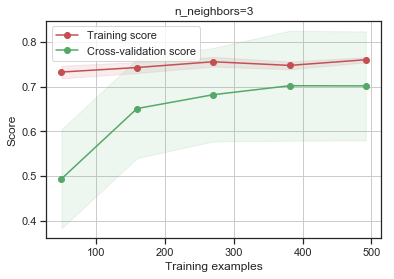

In [51]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=3', 
                    x_train, y_train, cv=20)

In [52]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

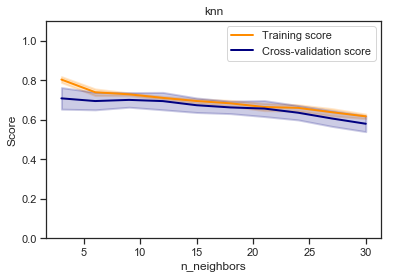

In [53]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      x_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=StratifiedKFold(n_splits=5), scoring="accuracy")